In [2]:
import pandas as pd
import numpy as np

# Treinando o modelo de classificação supervisionada

In [118]:
data = pd.read_csv('data/classification_dataset_att_random_forest_col.csv')
data.head()

,year,month,open_mean,open_var,open_min,open_max,close_mean,close_var,close_min,close_max,...,NetIncomeFromContinuingOperations,RetainedEarnings,TotalLiabilitiesNetMinorityInterest,high,low,adjclose,symbol,money_per_quota,percent_growth,classification
0,2024,9,33.475999,0.163230,33.090000,34.139999,33.207999,0.320471,32.419998,33.959999,...,744481000.0,1.711277e+09,1.839503e+10,34.020000,33.275002,31.711288,VICI,-3.040800,-9.156829,0
1,2024,12,30.579000,3.016032,28.660000,32.590000,29.994000,1.719629,28.790001,31.650000,...,624205000.0,1.867400e+09,1.841714e+10,32.599998,31.424999,30.377110,VICI,1.985200,6.618658,1
2,2025,3,32.248000,0.185020,31.650000,32.750000,31.806000,0.626480,30.590000,32.650002,...,552265000.0,1.954124e+09,1.850340e+10,32.939999,31.770000,31.781820,VICI,0.423849,1.332608,0
3,2025,6,31.937500,0.221891,31.450001,32.380001,32.034999,0.147233,31.469999,32.279999,...,878368000.0,2.362176e+09,1.860991e+10,31.910000,31.120001,31.048388,VICI,NaN,NaN,0
4,2024,9,61.820000,2.230548,59.860001,63.599998,61.998000,1.394120,60.250000,63.279999,...,111652000.0,-3.056708e+09,9.045630e+09,61.669998,59.730000,57.957142,WPC,-6.341001,-10.227750,0


In [60]:
data

,year,month,open_mean,open_var,open_min,open_max,close_mean,close_var,close_min,close_max,...,NetIncomeFromContinuingOperations,RetainedEarnings,TotalLiabilitiesNetMinorityInterest,high,low,adjclose,symbol,money_per_quota,percent_growth,classification
0,2024,9,33.475999,0.163230,33.090000,34.139999,33.207999,0.320471,32.419998,33.959999,...,744481000.0,1.711277e+09,1.839503e+10,34.020000,33.275002,31.711288,VICI,-3.040800,-9.156829,0
1,2024,12,30.579000,3.016032,28.660000,32.590000,29.994000,1.719629,28.790001,31.650000,...,624205000.0,1.867400e+09,1.841714e+10,32.599998,31.424999,30.377110,VICI,1.985200,6.618658,1
2,2025,3,32.248000,0.185020,31.650000,32.750000,31.806000,0.626480,30.590000,32.650002,...,552265000.0,1.954124e+09,1.850340e+10,32.939999,31.770000,31.781820,VICI,0.423849,1.332608,0
3,2025,6,31.937500,0.221891,31.450001,32.380001,32.034999,0.147233,31.469999,32.279999,...,878368000.0,2.362176e+09,1.860991e+10,31.910000,31.120001,31.048388,VICI,NaN,NaN,0
4,2024,9,61.820000,2.230548,59.860001,63.599998,61.998000,1.394120,60.250000,63.279999,...,111652000.0,-3.056708e+09,9.045630e+09,61.669998,59.730000,57.957142,WPC,-6.341001,-10.227750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2025,6,22.126000,0.011594,22.000000,22.250000,22.302500,0.083691,21.950001,22.650000,...,108349000.0,-2.027254e+09,5.873534e+09,22.447001,21.879999,21.592289,REGCO,NaN,NaN,0
635,2024,9,24.539800,0.172455,24.000000,25.129000,24.814000,0.280180,24.000000,25.260000,...,103576000.0,-1.935358e+09,5.482382e+09,24.340000,23.770000,22.470001,REGCP,-1.126000,-4.537760,0
636,2024,12,23.908000,0.331570,23.309999,24.660000,23.688000,0.122620,23.410000,24.290001,...,88677000.0,-1.980076e+09,5.491654e+09,24.680000,24.000000,23.099209,REGCP,-0.219600,-0.927053,0
637,2025,3,23.606400,0.035885,23.412001,23.820000,23.468400,0.200063,22.719999,23.850000,...,111853000.0,-2.001878e+09,5.683630e+09,23.650000,23.302000,22.859623,REGCP,-0.235900,-1.005180,0


## Seleção da porcentagem aceita

### 3% de crescimento
macro precision: 0.61
weighted precision: 0.61

### 15% de crescimento
macro precision: 0.66
weighted precision: 0.74

### 18% de crescimento
macro precision: 0.93
weighted precision: 0.88

In [108]:
percent_growth = data['percent_growth']
mean_data_p_growth = percent_growth[percent_growth > 0].mean()
print(mean_data_p_growth)

9.467474289887447


In [109]:
data['classification'] = (data['percent_growth'] > 6).astype(int)

In [110]:
data.dropna(inplace=True)

In [111]:
data['classification'].value_counts()

classification
0    380
1    105
Name: count, dtype: int64

In [112]:
train_data = data.drop(columns=['classification', 'symbol', 'year', 'month', 'money_per_quota', 'percent_growth'])
result_data = data['classification']

In [113]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, result_data, test_size=0.2, random_state=42)

print('Original dataset shape %s' % Counter(y_train))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 306, 1: 82})
Resampled dataset shape Counter({0: 82, 1: 82})


In [114]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_ros))

Original dataset shape Counter({0: 306, 1: 82})
Resampled dataset shape Counter({0: 306, 1: 306})


In [115]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
print('Original dataset shape %s' % Counter(y_train))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 306, 1: 82})
Resampled dataset shape Counter({0: 306, 1: 306})


Acurácia: 0.7216494845360825
Acurácia balanceada: 0.6377790834312573
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        74
           1       0.42      0.48      0.45        23

    accuracy                           0.72        97
   macro avg       0.63      0.64      0.63        97
weighted avg       0.73      0.72      0.73        97



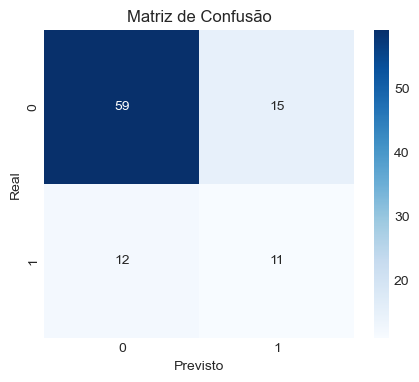

In [116]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")
print(f"Acurácia balanceada: {balanced_accuracy_score(y_test, y_pred)}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Treinando o modelo de classificação supervisionada gpt cols

In [117]:
data_gpt = pd.read_csv('data/classification_dataset_att.csv')
data_gpt

,year,month,open_mean,open_var,open_min,open_max,close_mean,close_var,close_min,close_max,...,NetIncomeFromContinuingOperations,RetainedEarnings,TotalLiabilitiesNetMinorityInterest,high,low,adjclose,symbol,money_per_quota,percent_growth,classification
0,2024,9,33.475999,0.163230,33.090000,34.139999,33.207999,0.320471,32.419998,33.959999,...,744481000.0,1.711277e+09,1.839503e+10,34.020000,33.275002,31.711288,VICI,-3.040800,-9.156829,0
1,2024,12,30.579000,3.016032,28.660000,32.590000,29.994000,1.719629,28.790001,31.650000,...,624205000.0,1.867400e+09,1.841714e+10,32.599998,31.424999,30.377110,VICI,1.985200,6.618658,1
2,2025,3,32.248000,0.185020,31.650000,32.750000,31.806000,0.626480,30.590000,32.650002,...,552265000.0,1.954124e+09,1.850340e+10,32.939999,31.770000,31.781820,VICI,0.423849,1.332608,0
3,2025,6,31.937500,0.221891,31.450001,32.380001,32.034999,0.147233,31.469999,32.279999,...,878368000.0,2.362176e+09,1.860991e+10,31.910000,31.120001,31.048388,VICI,NaN,NaN,0
4,2024,9,61.820000,2.230548,59.860001,63.599998,61.998000,1.394120,60.250000,63.279999,...,111652000.0,-3.056708e+09,9.045630e+09,61.669998,59.730000,57.957142,WPC,-6.341001,-10.227750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2025,6,22.126000,0.011594,22.000000,22.250000,22.302500,0.083691,21.950001,22.650000,...,108349000.0,-2.027254e+09,5.873534e+09,22.447001,21.879999,21.592289,REGCO,NaN,NaN,0
635,2024,9,24.539800,0.172455,24.000000,25.129000,24.814000,0.280180,24.000000,25.260000,...,103576000.0,-1.935358e+09,5.482382e+09,24.340000,23.770000,22.470001,REGCP,-1.126000,-4.537760,0
636,2024,12,23.908000,0.331570,23.309999,24.660000,23.688000,0.122620,23.410000,24.290001,...,88677000.0,-1.980076e+09,5.491654e+09,24.680000,24.000000,23.099209,REGCP,-0.219600,-0.927053,0
637,2025,3,23.606400,0.035885,23.412001,23.820000,23.468400,0.200063,22.719999,23.850000,...,111853000.0,-2.001878e+09,5.683630e+09,23.650000,23.302000,22.859623,REGCP,-0.235900,-1.005180,0


In [101]:
percent_growth = data['percent_growth']
mean_data_p_growth = percent_growth[percent_growth > 0].mean()
print(mean_data_p_growth)
data['classification'] = (data['percent_growth'] > 6).astype(int)
data.dropna(inplace=True)
print(data['classification'].value_counts())
train_data = data.drop(columns=['classification', 'symbol', 'year', 'month', 'money_per_quota', 'percent_growth'])
result_data = data['classification']

9.467474289887447
classification
0    380
1    105
Name: count, dtype: int64


In [102]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, result_data, test_size=0.2, random_state=42)

In [103]:
print('Original dataset shape %s' % Counter(y_train))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 306, 1: 82})
Resampled dataset shape Counter({0: 82, 1: 82})


In [104]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_ros))

Original dataset shape Counter({0: 306, 1: 82})
Resampled dataset shape Counter({0: 306, 1: 306})


In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
print('Original dataset shape %s' % Counter(y_train))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 306, 1: 82})
Resampled dataset shape Counter({0: 306, 1: 306})


Acurácia: 0.7216494845360825
Acurácia balanceada: 0.6377790834312573
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        74
           1       0.42      0.48      0.45        23

    accuracy                           0.72        97
   macro avg       0.63      0.64      0.63        97
weighted avg       0.73      0.72      0.73        97



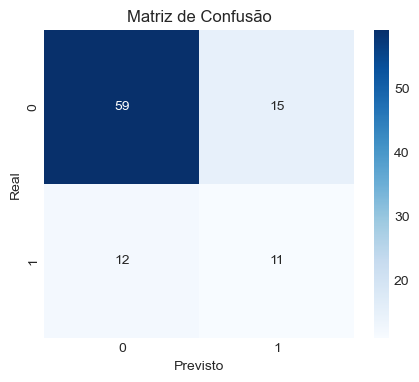

In [106]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")
print(f"Acurácia balanceada: {balanced_accuracy_score(y_test, y_pred)}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Análise dos ativos selecionados pelo modelo treinado gpt cols

In [ ]:
reit_novo_gpt = pd.read_csv('data/classification_dataset_att.csv')
reit_2025 = reit_novo_gpt[reit_novo_gpt['year'] >= 2025]
reit_2025 = reit_2025[reit_2025['month'] >= 6]
X_novos = reit_2025.drop(columns=['classification', 'symbol', 'year', 'month', 'money_per_quota', 'percent_growth'])
X_novos

In [ ]:
reit_novo_gpt['classification'] = model.predict(X_novos)

ativos_comprar_gpt = reit_novo_gpt[reit_novo_gpt['classification'] == 1]
ativos_vender_gpt = reit_novo_gpt[reit_novo_gpt['classification'] == 0]
ativos_comprar_gpt = ativos_comprar_gpt[['symbol', 'year', 'month', 'classification']]
ativos_vender_gpt = ativos_vender_gpt[['symbol', 'year', 'month', 'classification']]

In [ ]:
ativos_comprar_gpt.to_csv('data/ativos_comprar_resultado_gpt.csv', index=False)
ativos_vender_gpt.to_csv('data/ativos_vender_resultado_gpt.csv', index=False)

In [ ]:
ativo_comprar = pd.read_csv('data/ativos_comprar_resultados_valores.csv')

# --- Cálculo do Retorno Total ---

pct_variacao_total = ativo_comprar['pct_variation'].sum()

# Formata a string para o título do gráfico
cor_texto = 'green' if pct_variacao_total >= 0 else 'red'
titulo_total = f'Retorno Total: {pct_variacao_total:.2f}%'

# --- Configuração e Criação do Gráfico de Barras ---
plt.style.use('seaborn-v0_8-darkgrid') # Usa um estilo mais agradável para o gráfico
plt.figure(figsize=(15, 8))

# Define as cores das barras (verde para lucro, vermelho para prejuízo)
cores = ['green' if valor >= 0 else 'red' for valor in ativo_comprar['pct_variation']]
plt.bar(ativo_comprar['ticker'], ativo_comprar['pct_variation'], color=cores)

# Adiciona títulos e rótulos
plt.title(f'Variação Percentual dos Ativos (Lucro vs. Prejuízo)\n{titulo_total}', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Ativo (Ticker)', fontsize=14, fontweight='bold')
plt.ylabel('Variação Percentual (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adiciona uma linha horizontal em 0%
plt.axhline(0, color='black', linestyle='-', linewidth=1.5)

# Adiciona o texto de legenda de cor
plt.text(0.95, 0.95, 'Verde = Lucro\nVermelho = Prejuízo',
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.show()

In [ ]:
ativo_vender = pd.read_csv('data/ativos_vender_resultados_valores.csv')

# --- Cálculo do Retorno Total ---

pct_variacao_total = ativo_vender['pct_variation'].sum()

# Formata a string para o título do gráfico
cor_texto = 'green' if pct_variacao_total >= 0 else 'red'
titulo_total = f'Retorno Total: {pct_variacao_total:.2f}%'

# --- Configuração e Criação do Gráfico de Barras ---
plt.style.use('seaborn-v0_8-darkgrid') # Usa um estilo mais agradável para o gráfico
plt.figure(figsize=(15, 8))

# Define as cores das barras (verde para lucro, vermelho para prejuízo)
cores = ['green' if valor >= 0 else 'red' for valor in ativo_vender['pct_variation']]
plt.bar(ativo_vender['ticker'], ativo_vender['pct_variation'], color=cores)

# Adiciona títulos e rótulos
plt.title(f'Variação Percentual dos Ativos (Lucro vs. Prejuízo)\n{titulo_total}', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Ativo (Ticker)', fontsize=14, fontweight='bold')
plt.ylabel('Variação Percentual (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adiciona uma linha horizontal em 0%
plt.axhline(0, color='black', linestyle='-', linewidth=1.5)

# Adiciona o texto de legenda de cor
plt.text(0.95, 0.95, 'Verde = Lucro\nVermelho = Prejuízo',
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.show()

# Análise dos ativos selecionados pelo modelo treinado

In [ ]:
reit_novo = pd.read_csv('data/classification_dataset_att_random_forest_col.csv')
reit_2025 = reit_novo[reit_novo['year'] >= 2025]
reit_2025 = reit_2025[reit_2025['month'] >= 6]
X_novos = reit_2025.drop(columns=['classification', 'symbol', 'year', 'month', 'money_per_quota', 'percent_growth'])
X_novos

In [94]:
reit_2025['classification'] = model.predict(X_novos)

ativos_comprar = reit_2025[reit_2025['classification'] == 1]
ativos_vender = reit_2025[reit_2025['classification'] == 0]
ativos_comprar = ativos_comprar[['symbol', 'year', 'month', 'classification']]
ativos_vender = ativos_vender[['symbol', 'year', 'month', 'classification']]

In [95]:
ativos_vender['symbol']

7         WPC
45        CTO
56     CTO-PA
80        VTR
84        DOC
        ...  
582       GTY
614      PINE
630    KIM-PN
634     REGCO
638     REGCP
Name: symbol, Length: 62, dtype: object

In [84]:
ativos_comprar['year']

np.int64(2025)

In [79]:
ativos_comprar.to_csv('data/ativos_comprar_resultado.csv', index=False)

In [96]:
ativos_vender.to_csv('data/ativos_vender_resultado.csv', index=False)

In [86]:
resultados = pd.read_csv('data/ativos_comprar_resultados_valores.csv')
resultados

,Unnamed: 0,ticker,start,price_start,price_end,pct_variation
0,0,VICI,2025-06-01,31.770000,32.599998,2.612521
1,1,BNL,2025-06-01,16.020000,16.049999,0.187258
2,2,SBRA,2025-06-01,17.480000,18.440001,5.491997
3,3,PEB-PF,2025-06-01,18.459999,17.549999,-4.929577
4,4,PEB-PE,2025-06-01,18.129999,17.559999,-3.143959
5,5,PEB,2025-06-01,9.060000,9.990000,10.264893
6,6,PEB-PG,2025-06-01,18.660000,17.549999,-5.948556
7,7,STAG,2025-06-01,36.009998,36.279999,0.749793
8,8,REXR-PC,2025-06-01,21.689699,21.170000,-2.396064
9,9,VNO,2025-06-01,37.740002,38.240002,1.324854


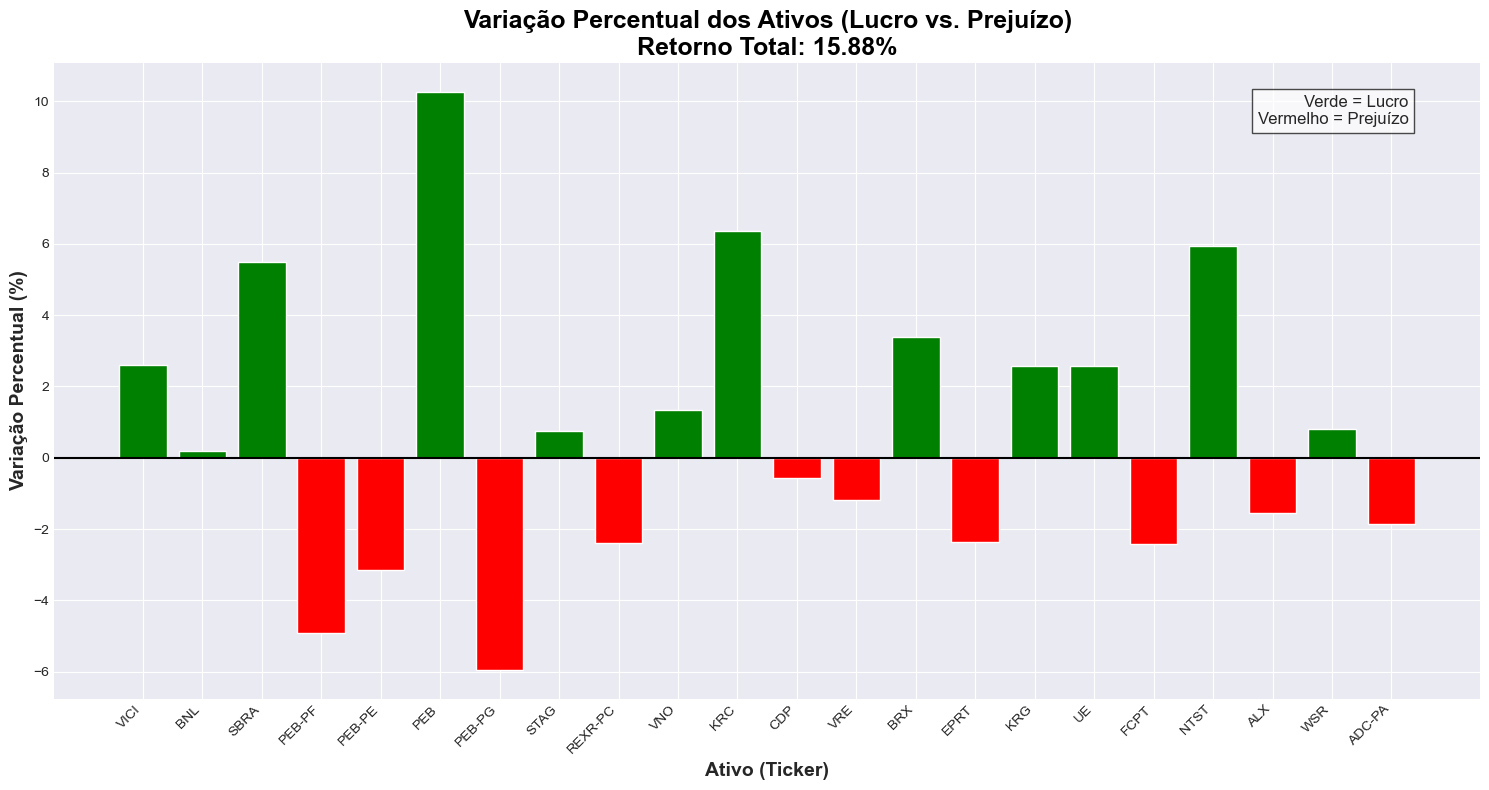

In [99]:
ativo_comprar = pd.read_csv('data/ativos_comprar_resultados_valores.csv')

# --- Cálculo do Retorno Total ---

pct_variacao_total = ativo_comprar['pct_variation'].sum()

# Formata a string para o título do gráfico
cor_texto = 'green' if pct_variacao_total >= 0 else 'red'
titulo_total = f'Retorno Total: {pct_variacao_total:.2f}%'

# --- Configuração e Criação do Gráfico de Barras ---
plt.style.use('seaborn-v0_8-darkgrid') # Usa um estilo mais agradável para o gráfico
plt.figure(figsize=(15, 8))

# Define as cores das barras (verde para lucro, vermelho para prejuízo)
cores = ['green' if valor >= 0 else 'red' for valor in ativo_comprar['pct_variation']]
plt.bar(ativo_comprar['ticker'], ativo_comprar['pct_variation'], color=cores)

# Adiciona títulos e rótulos
plt.title(f'Variação Percentual dos Ativos (Lucro vs. Prejuízo)\n{titulo_total}', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Ativo (Ticker)', fontsize=14, fontweight='bold')
plt.ylabel('Variação Percentual (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adiciona uma linha horizontal em 0%
plt.axhline(0, color='black', linestyle='-', linewidth=1.5)

# Adiciona o texto de legenda de cor
plt.text(0.95, 0.95, 'Verde = Lucro\nVermelho = Prejuízo',
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.show()

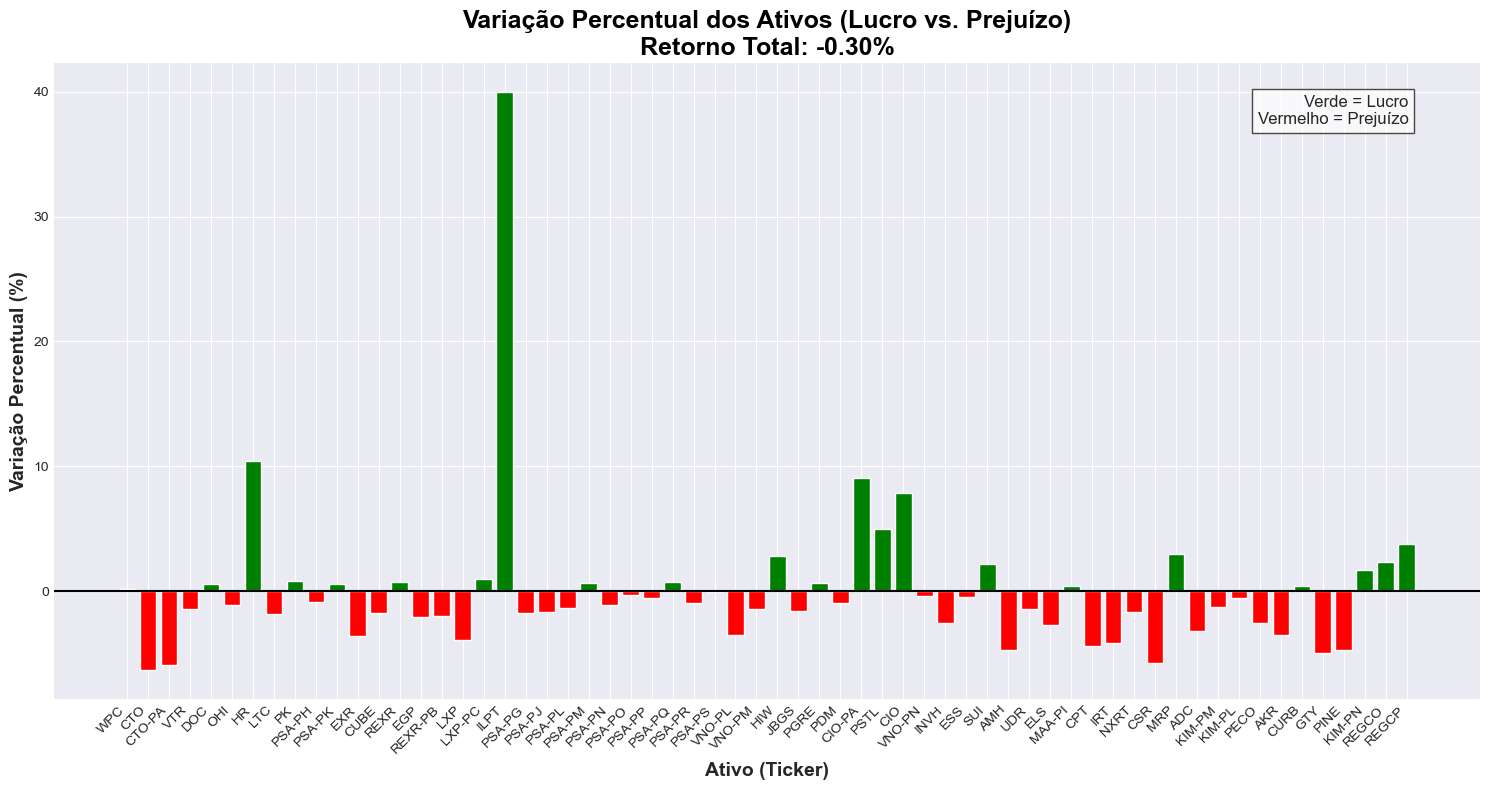

In [98]:
ativo_vender = pd.read_csv('data/ativos_vender_resultados_valores.csv')

# --- Cálculo do Retorno Total ---

pct_variacao_total = ativo_vender['pct_variation'].sum()

# Formata a string para o título do gráfico
cor_texto = 'green' if pct_variacao_total >= 0 else 'red'
titulo_total = f'Retorno Total: {pct_variacao_total:.2f}%'

# --- Configuração e Criação do Gráfico de Barras ---
plt.style.use('seaborn-v0_8-darkgrid') # Usa um estilo mais agradável para o gráfico
plt.figure(figsize=(15, 8))

# Define as cores das barras (verde para lucro, vermelho para prejuízo)
cores = ['green' if valor >= 0 else 'red' for valor in ativo_vender['pct_variation']]
plt.bar(ativo_vender['ticker'], ativo_vender['pct_variation'], color=cores)

# Adiciona títulos e rótulos
plt.title(f'Variação Percentual dos Ativos (Lucro vs. Prejuízo)\n{titulo_total}', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Ativo (Ticker)', fontsize=14, fontweight='bold')
plt.ylabel('Variação Percentual (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adiciona uma linha horizontal em 0%
plt.axhline(0, color='black', linestyle='-', linewidth=1.5)

# Adiciona o texto de legenda de cor
plt.text(0.95, 0.95, 'Verde = Lucro\nVermelho = Prejuízo',
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.show()

## Reit index
O Reit index no mesmo periodo de tempo analisado desses ativos selecionados foi de -2.06%

In [121]:
data_gpt.columns

Index(['year', 'month', 'open_mean', 'open_var', 'open_min', 'open_max',
       'close_mean', 'close_var', 'close_min', 'close_max', 'dividends_mean',
       'dividends_var', 'dividends_min', 'dividends_max', 'volume_mean',
       'volume_var', 'volume_min', 'volume_max', 'AccountsReceivable',
       'BasicEPS', 'CashAndCashEquivalents', 'EBIT', 'EnterpriseValue',
       'FreeCashFlow', 'GrossProfit', 'InvestedCapital', 'LongTermDebt',
       'MarketCap', 'NetIncomeFromContinuingOperations', 'RetainedEarnings',
       'TotalLiabilitiesNetMinorityInterest', 'high', 'low', 'adjclose',
       'symbol', 'money_per_quota', 'percent_growth', 'classification'],
      dtype='object')

In [122]:
data.columns

Index(['year', 'month', 'open_mean', 'open_var', 'open_min', 'open_max',
       'close_mean', 'close_var', 'close_min', 'close_max', 'dividends_mean',
       'dividends_var', 'dividends_min', 'dividends_max', 'volume_mean',
       'volume_var', 'volume_min', 'volume_max', 'AccountsReceivable',
       'BasicEPS', 'CashAndCashEquivalents', 'EBIT', 'EnterpriseValue',
       'FreeCashFlow', 'GrossProfit', 'InvestedCapital', 'LongTermDebt',
       'MarketCap', 'NetIncomeFromContinuingOperations', 'RetainedEarnings',
       'TotalLiabilitiesNetMinorityInterest', 'high', 'low', 'adjclose',
       'symbol', 'money_per_quota', 'percent_growth', 'classification'],
      dtype='object')